# Trial analysis from an simple excel

## Visualize the required format for the xlsx file

MNA requires at least a three columns, `x` (in screen coordinates), `y` (in screen coordinates) and `time` (in seconds)

In [6]:
import pandas as pd
pd.read_excel('../sample_data/1imageSubset.xlsx').head()

,pupil,time,trial,x,y
0,663,-91761,1,1608.6,2670.4
1,693,-91759,1,1567.6,2541.9
2,695,-91757,1,1529.2,2406.5
3,694,-91755,1,1488.5,2273.6
4,697,-91753,1,1454.7,2170.3


## Imports

In [1]:
from mna.sessions.eye_session import process_eye_trial_xlsx

## Analyze the xlsx file

This function processes a single trial worth of data, defined as the entire _.xlsx_ file presently. It simply reads the file, converts the coordinates to degrees, and runs the pre-configured *NSLR* algorithm to generate classes. The *NSLR* classifier is the best performing in most tests but you can also try *REMODNAV*. `screen_max_x` and `screen_max_y` are used to determine the center of the screen to referece coordinates.

In [8]:
eye_data, intervals_nan, eye_results_df, fig = process_eye_trial_xlsx(xlsx_filename = '../sample_data/1imageSubset.xlsx', classifiers = 'NSLR', plot_eye_result=True, screen_max_x=1280, screen_max_y=960)

## Results

### Classification result for each sample

*x_deg* and *y_deg* are the converted visual degrees of the x and y coordinate data respectively. *NSLR_Segment* is the number of event (segment) for that sample, and *NSLR_Class* is the class label.

In [15]:
print(f"intervals unable to be classified: {intervals_nan}")
eye_data.head()

intervals unable to be classified: []


,x,y,timestamp,x_deg,y_deg,NSLR_Segment,NSLR_Class
0,1608.6,2670.4,-91761,86.160799,88.300250,1.0,Fixation
1,1567.6,2541.9,-91759,85.991647,88.194387,1.0,Fixation
2,1529.2,2406.5,-91757,85.819148,88.067577,1.0,Fixation
3,1488.5,2273.6,-91755,85.619368,87.924511,1.0,Fixation
4,1454.7,2170.3,-91753,85.438378,87.797792,1.0,Fixation


### Aggregate summary of classes

For each class recognized, *count* is the total count in the trial, *first_onset* is the first occurance (in seconds) of the class in the trial, *mean_duration* is the average duration (in seconds) of the class across all occurances. *class_onsets* is an continuous iterable that can be used for sequencing the trial.

In [17]:
eye_results_df

,0
NSLR_count.Fixation,50.0
NSLR_count.Smooth Pursuit,5.0
NSLR_first_onset.Fixation,-91761.0
NSLR_first_onset.Smooth Pursuit,241.0
NSLR_mean_duration.Fixation,2091.64
NSLR_mean_duration.Smooth Pursuit,12.4
NSLR_class_onsets,"[[-91761, Fixation], [-91409, Fixation], [-913..."


### Visualization of segments

A simple figure showing the x and y visual angles in degrees (top and bottom respectively), colored by class for each recognized segment. It is a quick visualization of information contained in *eye_data*.

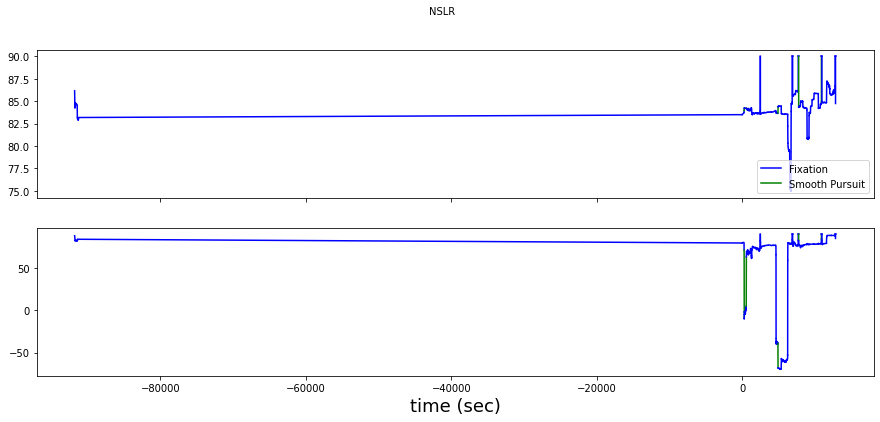

In [14]:
fig